## This notebook will contain some simple visuals to get insights of the preprocessed data. 

In [ ]:
%pip install calmap

In [1]:
import warnings
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
import calmap

from utils.merge_tools import merge_n_case_ids

In [2]:
data_dir = '../data/processed/grouped/new_aggs/'
base_file = '../data/raw/csv_files/train/train_base.csv'

In [3]:
merged_data = merge_n_case_ids(
    n_ids=20000,
    data_dir=data_dir,
    path_to_base=base_file,
    use_0=True,
    as_pandas=True,
    random_state=28
)
case_ids_list = list(merged_data['case_id'])

merged_data = merge_n_case_ids(
    n_ids=20000,
    data_dir=data_dir,
    path_to_base=base_file,
    use_0=False,
    as_pandas=True,
    case_id_list=case_ids_list,
    random_state=28
)

In [4]:
merged_data

,case_id,date_decision,MONTH,WEEK_NUM,target,amount_1115A_min,credlmt_1052A_min,credlmt_228A_min,credlmt_3940954A_min,credquantity_1099L_min,...,pmts_pmtsoverdue_635A_median,pmts_dpdvalue_108P_sum,pmts_pmtsoverdue_635A_sum,pmts_date_1107D_distinct,pmts_date_1107D_min_year,pmts_date_1107D_min_month,pmts_date_1107D_min_day,pmts_date_1107D_max_year,pmts_date_1107D_max_month,pmts_date_1107D_max_day
0,11,2019-01-03,201901,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22,2019-01-03,201901,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,129,2019-01-04,201901,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,359,2019-01-05,201901,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,423,2019-01-08,201901,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2703318,2020-10-05,202010,91,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,2703342,2020-10-05,202010,91,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,2703400,2020-10-05,202010,91,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,2703435,2020-10-05,202010,91,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Credit amount of the active contract provided by the credit bureau distributed weekly

Text(0, 0.5, 'Minimum Amount')

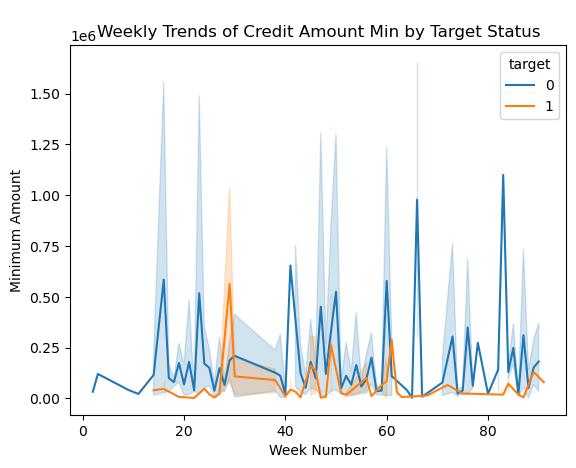

In [5]:
sns.lineplot(data=merged_data, x='WEEK_NUM', y='amount_1115A_min', hue='target')
plt.title("Weekly Trends of Credit Amount Min by Target Status")
plt.xlabel("Week Number")
plt.ylabel("Minimum Amount")

The higher variability and spikes in the trend for target 0 suggest that these instances might be more prone to significant changes in credit amounts, possibly indicating higher risk or different credit behavior patterns compared to target 1.
Spikes in the blue line suggest periods where certain instances had very high minimum credit amounts. These spikes might be driven by specific events or anomalies in the data.
The orange line has smaller and fewer spikes, indicating more consistency in the minimum credit amounts for instances with a target status of 1.

## Distribution of Minimum Credit Amount of the active contract provided by credit bureau

Text(0.5, 1.0, 'Distribution of Minimum Credit Amount of the active contract')

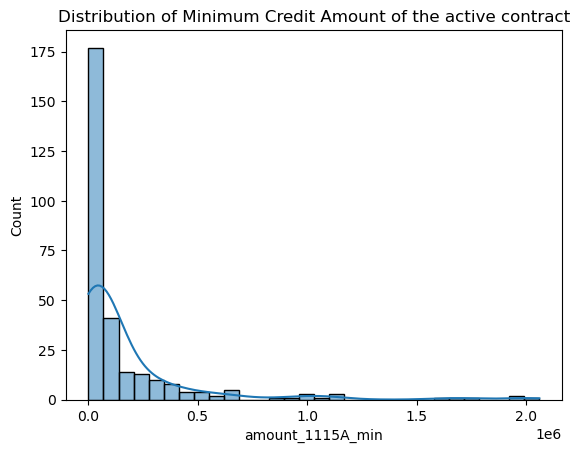

In [6]:
sns.histplot(data=merged_data, x='amount_1115A_min', bins=30, kde=True)
plt.title("Distribution of Minimum Credit Amount of the active contract")

## Correlation Heatmap of the relationship between different credit limits and amounts, and how they correlate with each other and with the target variable

Text(0.5, 1.0, 'Correlation Matrix of Financial Variables and Target')

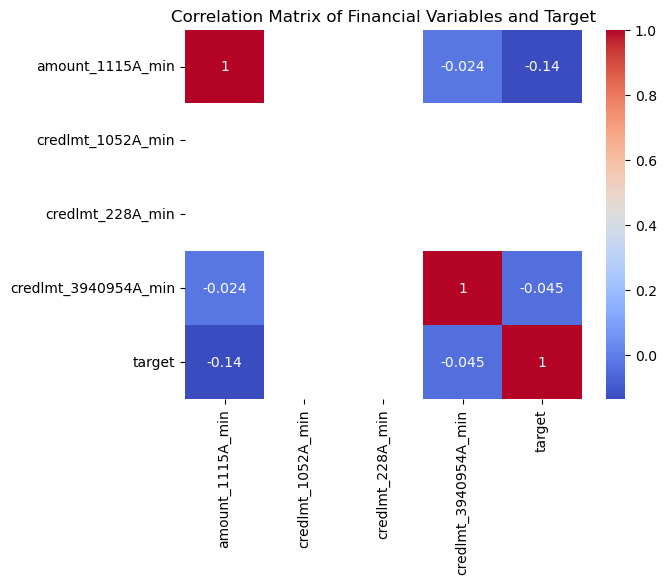

In [7]:
# Selecting columns with continuous data
cols = ['amount_1115A_min', 'credlmt_1052A_min', 'credlmt_228A_min', 'credlmt_3940954A_min', 'target']
correlation_matrix = merged_data[cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Financial Variables and Target")

## Payments overdue

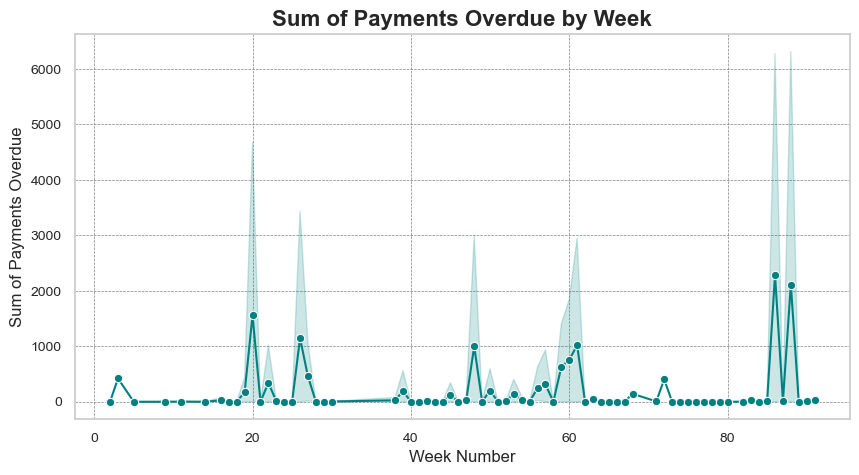

In [16]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 5))  # Adjusting figure size for better visibility
ax = sns.lineplot(data=merged_data, x='WEEK_NUM', y='pmts_pmtsoverdue_635A_sum', marker='o', color='teal')  # Added marker

# Adding title and labels with enhanced font settings
ax.set_title("Sum of Payments Overdue by Week", fontsize=16, fontweight='bold')
ax.set_xlabel("Week Number", fontsize=12)
ax.set_ylabel("Sum of Payments Overdue", fontsize=12)

# Customizing the grid lines for better readability
ax.grid(True, which="both", linestyle='--', linewidth=0.5, color='gray')

# Enhancing visibility of plot elements
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()

The graph highlights significant variability in the sum of payments overdue by week, with notable spikes around weeks 20, 60, and 80-90. These peaks suggest times of increased financial stress or defaults, likely driven by specific seasonal, economic, or policy factors. Understanding these trends can aid in better risk management and predictive modeling, ensuring more effective strategies to handle periods of high financial risk.

Text(0.5, 1.0, 'Sum of Payments Overdue by Week')

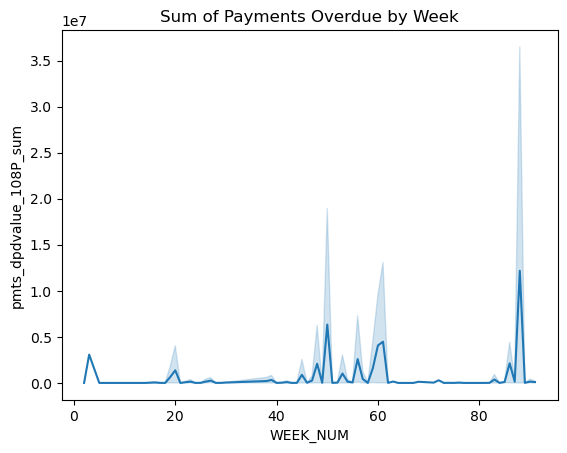

In [12]:
sns.lineplot(data=merged_data, x='WEEK_NUM', y='pmts_dpdvalue_108P_sum')
plt.title("Sum of Payments Overdue by Week")

In [10]:
# Convert 'date_decision' from object (string) to 'datetime64[ns]'
merged_data['date_decision'] = pd.to_datetime(merged_data['date_decision'])

# Extract day, month, and year into separate columns with specific names
merged_data['date_decision_year'] = merged_data['date_decision'].dt.year
merged_data['date_decision_month'] = merged_data['date_decision'].dt.month
merged_data['date_decision_day'] = merged_data['date_decision'].dt.day

# Display the DataFrame to see the changes
print(merged_data)

       case_id date_decision   MONTH  WEEK_NUM  target  amount_1115A_min  \
0           11    2019-01-03  201901         0       0               NaN   
1           22    2019-01-03  201901         0       0               NaN   
2          129    2019-01-04  201901         0       1               NaN   
3          359    2019-01-05  201901         0       0               NaN   
4          423    2019-01-08  201901         1       0               NaN   
...        ...           ...     ...       ...     ...               ...   
19995  2703318    2020-10-05  202010        91       0               NaN   
19996  2703342    2020-10-05  202010        91       0               NaN   
19997  2703400    2020-10-05  202010        91       1               NaN   
19998  2703435    2020-10-05  202010        91       0               NaN   
19999  2703445    2020-10-05  202010        91       0               NaN   

       credlmt_1052A_min  credlmt_228A_min  credlmt_3940954A_min  \
0                  

## Time Series Plot of Decisions Over Time
### Count of decisions changes over time. It is useful for spotting trends, seasonal patterns, or anomalies

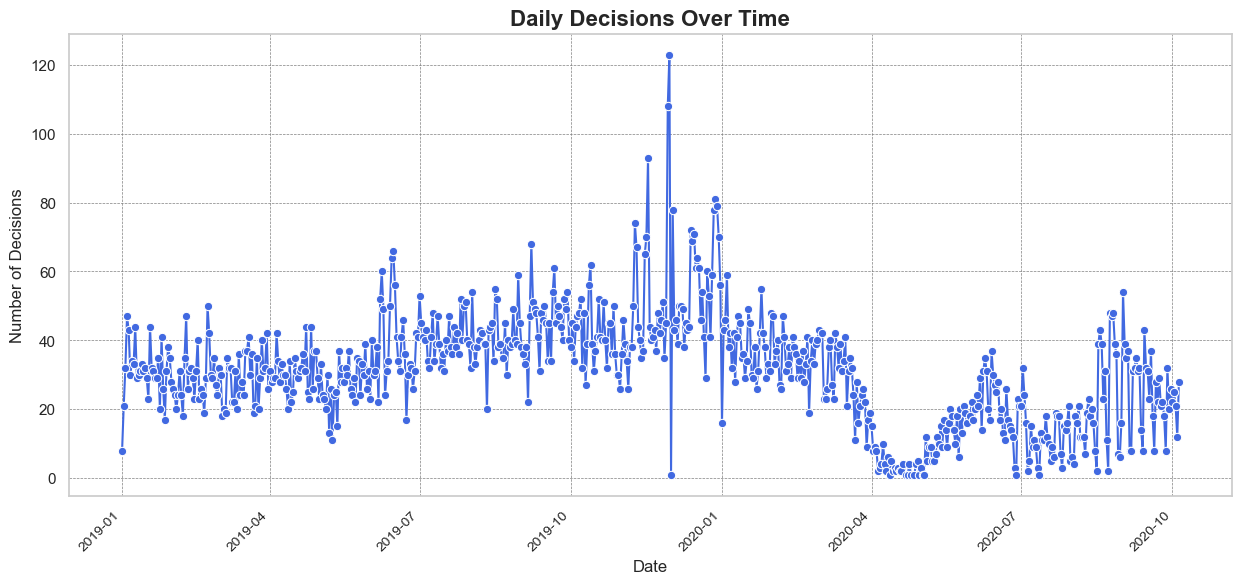

In [13]:
merged_data['date_decision'] = pd.to_datetime(merged_data['date_decision'])

# Group by date to count decisions per day
daily_decisions = merged_data.groupby('date_decision').size()

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 6))  # Adjusting figure size for better visibility
ax = sns.lineplot(x=daily_decisions.index, y=daily_decisions.values, color='royalblue', marker='o')  # Added marker

# Setting titles and labels with enhanced font settings
ax.set_title("Daily Decisions Over Time", fontsize=16, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Decisions", fontsize=12)

# Improve readability of x-axis labels
plt.xticks(rotation=45)
plt.setp(ax.get_xticklabels(), fontsize=10, ha='right')

# Customize the grid lines for better readability
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

# Show the plot
plt.show()

### Analysis and Considerations:

Seasonal Effects: Seasonal effects, such as financial year-end processing or policy changes, might influence the number of decisions.

Operational Changes: Investigate any operational changes or external factors aligning with significant increases or decreases in decisions.

Pandemic Influence: Analyze the drop and subsequent variability in decisions during 2020 in the context of the COVID-19 pandemic to understand its impact on decision-making processes.

## Monthly Aggregation of Decisions
### Grouping the decisions by month to observe broader trends, which can help mitigate the noise in daily data and reveal longer-term trends.

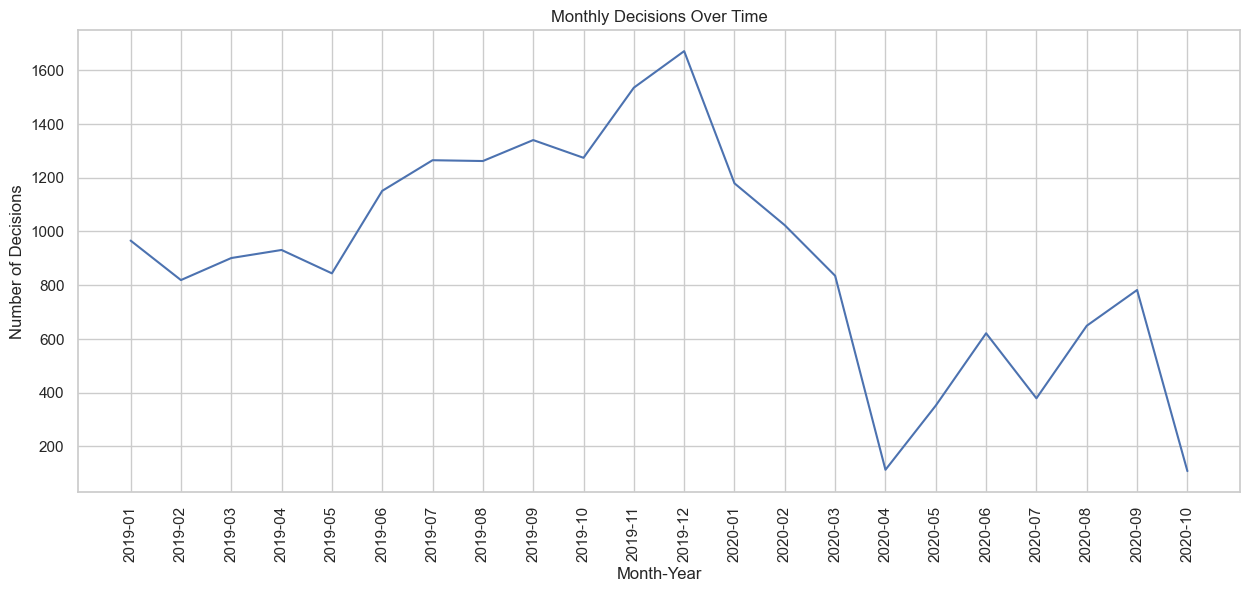

In [12]:
merged_data['month_year'] = merged_data['date_decision'].dt.to_period('M')

monthly_decisions = merged_data.groupby('month_year').size()

plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_decisions.index.astype(str), y=monthly_decisions.values)
plt.title("Monthly Decisions Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Decisions")
plt.xticks(rotation=90)
plt.show()

## Understanding the distribution of any numeric variable across months, such as the amount or any other relevant financial metrics

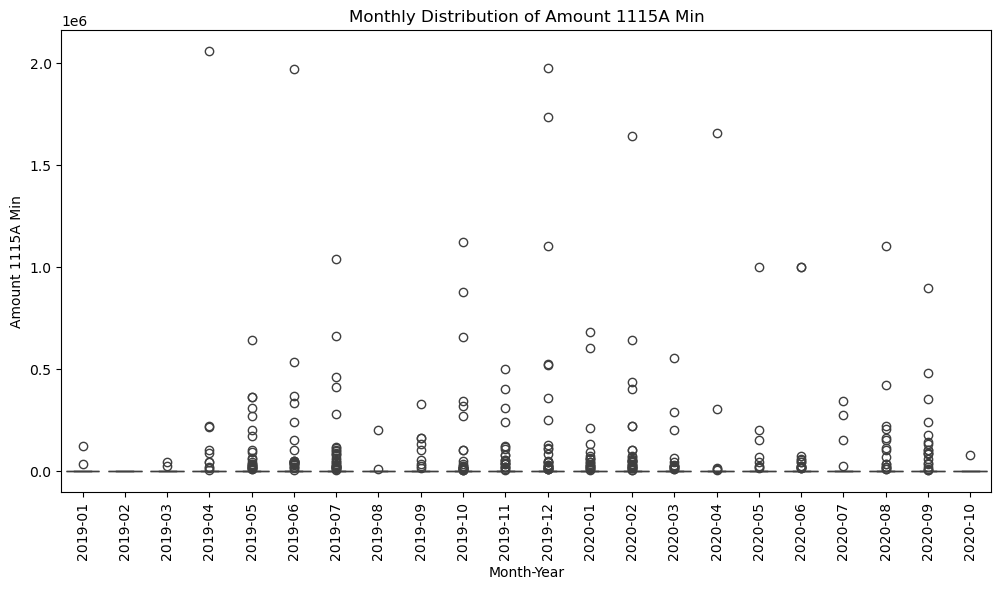

In [21]:
merged_data['amount_1115A_min'].fillna(0, inplace=True) #filling NaNs with 0

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='month_year', y='amount_1115A_min')
plt.title("Monthly Distribution of Amount 1115A Min")
plt.xlabel("Month-Year")
plt.ylabel("Amount 1115A Min")
plt.xticks(rotation=90)
plt.show()

## Calendar heatmap to visualize the density of decisions throughout the year.

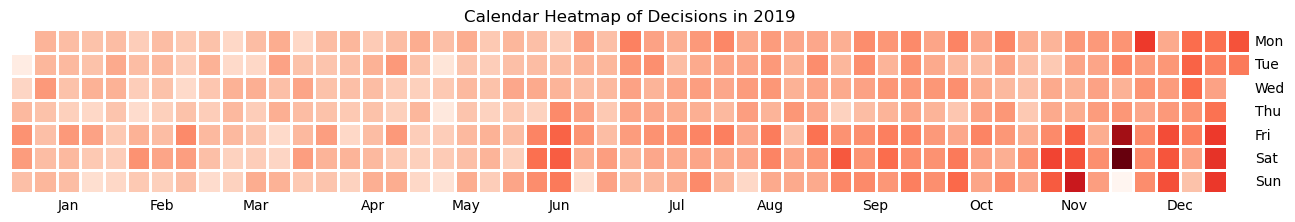

In [22]:
daily_decisions = merged_data.groupby('date_decision').size()

# Plot the calendar heatmap
plt.figure(figsize=(16, 10))
calmap.yearplot(daily_decisions, year=2019)  # Change the year as needed
plt.title('Calendar Heatmap of Decisions in 2019')
plt.show()